# **Import libraries**

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import nltk
import matplotlib.pyplot as plt
import datetime
from datetime import date
import time
import pickle

# **Load functions for data cleaning**

In [2]:
%run "drive/MyDrive/Colab Notebooks/NSlab2/cleaning_mod.ipynb"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=657cd3424a6a110c07e6ebbef09d142df59fc1088ddf0ed5733f493401d0e0a4
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.8 MB/s eta 0:00:00


# **Load Reddit data**

In [3]:
in_dir = "drive/MyDrive/Colab Notebooks/NSlab2/"
in_file = "reddit_posts_stored"
df = pd.read_csv(in_dir+in_file+".csv")
df = df[["id","created","title"]] # we only keep a few meaningful entries
display(df)

,id,created,title
0,17llfpj,2023-11-01,Pope says two-state solution needed for Israel...
1,174atj1,2023-10-10,Israel-Palestine conflict: Indian hackers hack...
2,16g722n,2023-09-11,Meta deletes Al Jazeera presenter’s profile af...
3,12qfptp,2023-04-18,China ready to broker Israel-Palestine peace t...
4,175x8lw,2023-10-12,Palestine envoy urges India to step in to reso...
...,...,...,...
1328,10vjbeg,2023-02-06,Anti-Zionism = antisemitism? The case of Naye ...
1329,177yeut,2023-10-14,Why does u.s news broadcast seem to show suppo...
1330,17hoqr0,2023-10-27,A pro Israeli debunking some myths
1331,10yw3pw,2023-02-10,Anyone who doesn’t support the pre67 borders i...


# **Clean Reddit titles**

In [4]:
# superficial cleaning
df['text_sup_clean'] = df['title'].apply(superficial_cleaning)

# deep cleaning
POS_KEEP = ["ADJ","ADV","NOUN","PROPN","VERB","NUM"] # we do not include "PRON"
df['text_deep_clean'] = df['text_sup_clean'].apply(deep_cleaning)
df['text_deep_clean_pos'] = df['text_sup_clean'].apply(deep_cleaning_pos)

# extract hashtags (if present)
df['hashtags'] = df['title'].apply(get_hashtags)

# display the result
display(df)

<ipython-input-2-6f1622b626a2>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(selftext, "html.parser")
<ipython-input-2-6f1622b626a2>:6: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(selftext, "html.parser")


,id,created,title,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags
0,17llfpj,2023-11-01,Pope says two-state solution needed for Israel...,pope says two state solution needed for israel...,pope say two state solution need israel palestine,"[pope PROPN, say VERB, two NUM, state NOUN, so...",[]
1,174atj1,2023-10-10,Israel-Palestine conflict: Indian hackers hack...,israel palestine conflict indian hackers hack ...,israel palestine conflict indian hacker hack p...,"[israel PROPN, palestine PROPN, conflict PROPN...",[]
2,16g722n,2023-09-11,Meta deletes Al Jazeera presenter’s profile af...,meta deletes al jazeera presenter s profile af...,meta delete al jazeera presenter s profile sho...,"[meta PROPN, delete VERB, al PROPN, jazeera PR...",[]
3,12qfptp,2023-04-18,China ready to broker Israel-Palestine peace t...,china ready to broker israel palestine peace t...,china ready broker israel palestine peace talk...,"[china PROPN, ready ADJ, broker VERB, israel P...",[]
4,175x8lw,2023-10-12,Palestine envoy urges India to step in to reso...,palestine envoy urges india to step in to reso...,palestine envoy urge india step resolve gaza c...,"[palestine PROPN, envoy NOUN, urge VERB, india...",[]
...,...,...,...,...,...,...,...
1328,10vjbeg,2023-02-06,Anti-Zionism = antisemitism? The case of Naye ...,anti zionism antisemitism the case of naye idris,antisemitism case naye idris,"[antisemitism NOUN, case NOUN, naye PROPN, idr...",[]
1329,177yeut,2023-10-14,Why does u.s news broadcast seem to show suppo...,why does you s news broadcast seem to show sup...,s news broadcast seem show support israel,"[s VERB, news NOUN, broadcast NOUN, seem VERB,...",[]
1330,17hoqr0,2023-10-27,A pro Israeli debunking some myths,a pro israeli debunking some myths,pro israeli debunk myth,"[pro ADJ, israeli ADJ, debunk VERB, myth NOUN]",[]
1331,10yw3pw,2023-02-10,Anyone who doesn’t support the pre67 borders i...,anyone who does not support the pre borders is...,support pre border genocidal,"[support VERB, pre ADJ, border NOUN, genocidal...",[]


In [5]:
# store the results
out_dir = "drive/MyDrive/Colab Notebooks/NSlab2/"
out_file = "reddit_titles"
df.to_excel(out_dir+out_file+"_cleaned.xlsx", index=True)

# **Build an occurrence matrix for words and hashtags**

In [6]:
# collection of words
words = np.unique([item for sublist in df['text_deep_clean_pos'] for item in sublist])
# words dictionary
words_dict = dict(zip(words,range(len(words))))
# occurrence matrix for words
Mwd = csr_matrix((len(words_dict), len(df)), dtype = np.int8).toarray()
for i in range(len(df)):
  for j in df['text_deep_clean_pos'][i]:
    Mwd[words_dict[j],i] += 1

In [7]:
# collection of hashtags
hashtags = np.unique([item for sublist in df['hashtags'] for item in sublist])
# add the # sign
hashtags2 = np.unique(["#"+item for sublist in df['hashtags'] for item in sublist])
# hashtags dictionary
hashtags_dict = dict(zip(hashtags,range(len(hashtags))))
# occurrence matrix for hashtags
Mhd = csr_matrix((len(hashtags_dict), len(df)), dtype = np.int8).toarray()
for i in range(len(df)):
  for j in df['hashtags'][i]:
    Mhd[hashtags_dict[j],i] += 1

In [8]:
# join words and hashtags
Mwd = np.vstack((Mwd, Mhd)) # in one occurrence matrix
words = np.hstack((words, hashtags2)) # in one word+hashtags list
documents = np.array(df["id"].tolist()) # further collect documents names

# **Remove least occurring words**

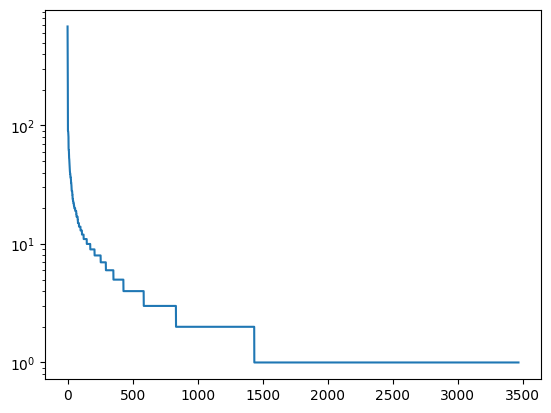

In [9]:
# display word occurrences first
plt.figure()
plt.semilogy(-np.sort(-np.sum(Mwd,axis=1)))
plt.savefig(out_dir+out_file+"_statistics.png")

In [10]:
# remove words that are used once or twice
select = (np.sum(Mwd,axis=1)>2)
Mwd = Mwd[select,:]
words = words[select]
# remove documents that do not contain words
select = (np.sum(Mwd,axis=0)>0)
Mwd = Mwd[:,select]
documents = documents[select]
# display final matrix size
display(Mwd.shape)

(834, 1302)

In [11]:
# store the result
pickle.dump([Mwd,words,documents], open(out_dir+out_file+"_occurrences.p", "wb"))
# c,d,e = pickle.load(open(out_dir+out_file+"_occurrences.p","rb"))